In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# data source 
url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
df = pd.read_csv(url, header=None)

In [23]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# splits the data into feature and response variables
X = df.drop([4], axis = 1)
y = df[4]

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

In [26]:
# array of k_values from 1 to 20 
k_values = np.arange(1,21)

# empty array that will keep track of accuracy rate 
test_accuracy_rate = np.array([])

# loop that iterates from 1 to 20
for k in k_values: 
   
    # total_accuracy that set back to 0 between each iteration for k  
    total_accuracy = 0
    
    # loop that will averages 5 accruracy scores using current k value 
    for iteration in range(1,6):
        # randomly splits data with test size being 33% and training size 67%
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        # creates a knn classifier with current k value
        knn_model = KNeighborsClassifier(n_neighbors = k) 
        # trains the model with x training data and y training data
        knn_model.fit(X_train, y_train)
        # predicts y values using trained model and x test data
        y_pred_test = knn_model.predict(X_test)
        # takes the total sum of 5 different accuracy scores based on y test values and predicted y values 
        total_accuracy += accuracy_score(y_test, y_pred_test)
    # takes the average of total accuracy score of 5 different acuracy scores
    test_accuracy_rate = np.append(test_accuracy_rate, (total_accuracy / 5) * 100)  
    


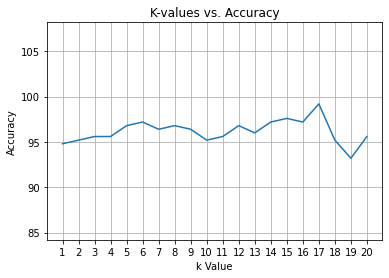

In [27]:
fig, ax = plt.subplots()
# plots the list of k values and the list test accuracy rate
ax.plot(k_values, test_accuracy_rate)
# sets the x axis by calculating a range of values between 1 to 20 with distance of 1 apart
ax.xaxis.set_ticks(np.arange(1, 21, 1))
plt.title("K-values vs. Accuracy")
plt.xlabel("k Value")
plt.ylabel("Accuracy")
# sets y axis by dynamically calculating 1.5 the min and max of y values
IQR = np.max(test_accuracy_rate) - np.min(test_accuracy_rate)
minLimit = np.min(test_accuracy_rate) - (IQR * 1.5)
maxLimit = np.max(test_accuracy_rate) + (IQR * 1.5)
plt.ylim(minLimit, maxLimit)
# displays grid for graph
plt.grid(True)
plt.show()